In [2]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom


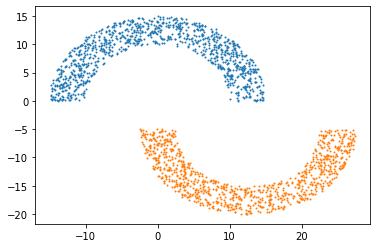

In [18]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [19]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [15]:
print(data)

[[  1.          -1.21034776  10.45006505   1.        ]
 [  1.           0.60005     13.89918002   1.        ]
 [  1.          -1.6407853   10.8266531    1.        ]
 ...
 [  1.          13.16896746 -15.79961     -1.        ]
 [  1.          24.39758531 -13.96032953  -1.        ]
 [  1.          -9.71748021   2.8394784    1.        ]]


[-16.9836356   29.48366241]
[ 4.64522425 -7.63902913]


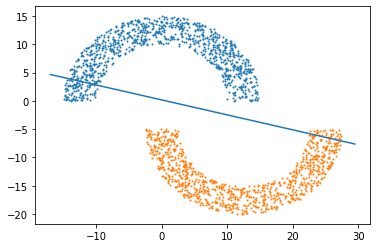

[-16.9836356   29.48366241]
[-24.66546509  42.81935053]


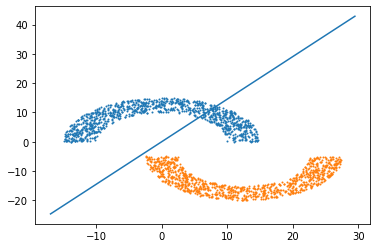

[-16.9836356   29.48366241]
[ 4.53838681 -8.24669433]


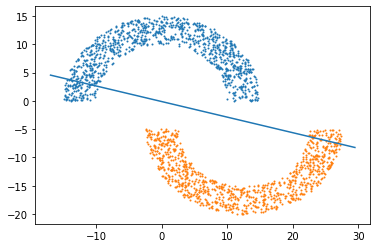

[-16.9836356   29.48366241]
[-18.16453909  30.93363273]


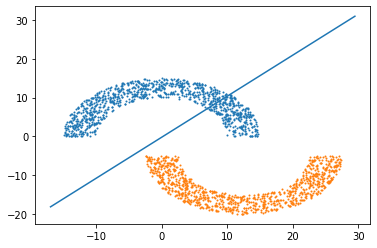

[-16.9836356   29.48366241]
[-0.83282782  0.89672673]


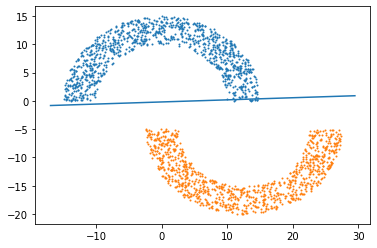

[-16.9836356   29.48366241]
[ 14.69591629 -26.23772826]


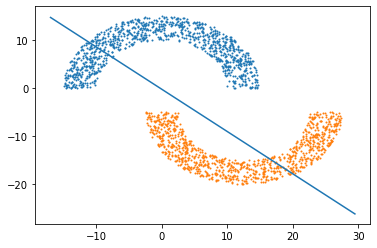

[-16.9836356   29.48366241]
[-7.0969261  12.02803717]


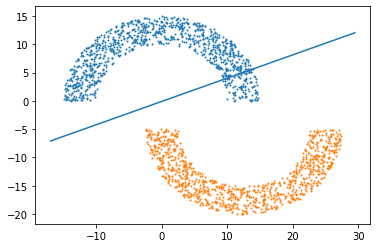

[-16.9836356   29.48366241]
[-0.89796454  1.18912023]


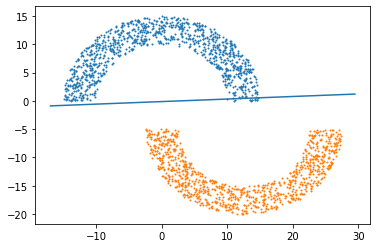

[-16.9836356   29.48366241]
[  6.9341504  -12.49702844]


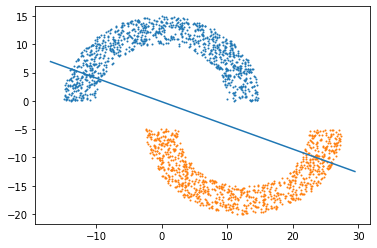

[-16.9836356   29.48366241]
[-6.09320984 10.293681  ]


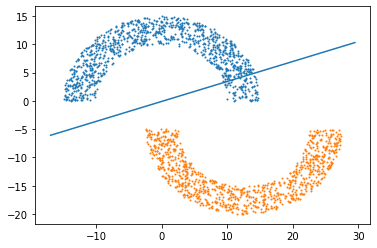

[-16.9836356   29.48366241]
[-0.51987415  0.56009054]


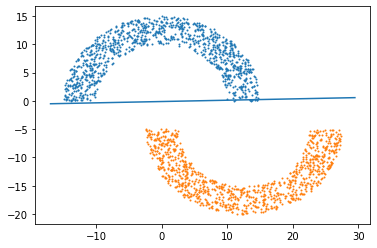

[-16.9836356   29.48366241]
[ 4.18737851 -7.67933731]


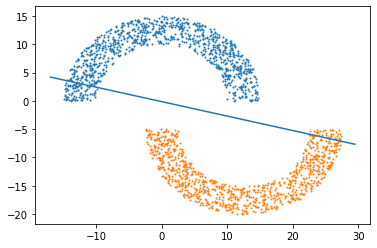

[-16.9836356   29.48366241]
[-6.01377356 10.14158316]


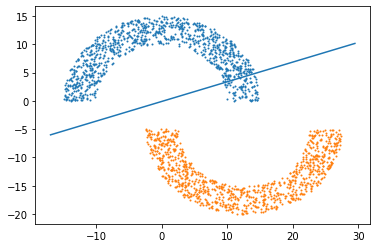

[-16.9836356   29.48366241]
[-1.46200211  2.19948088]


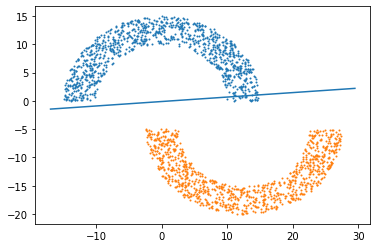

[-16.9836356   29.48366241]
[ 2.76930221 -5.19606813]


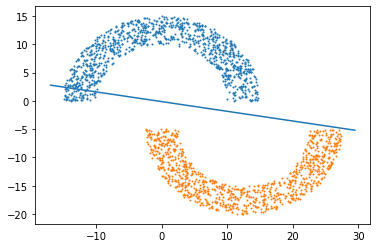

[-16.9836356   29.48366241]
[-2.13228184  3.25931222]


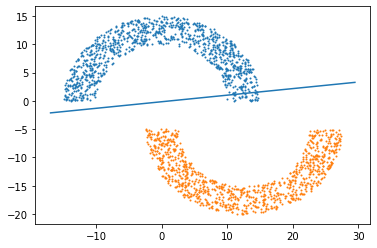

[-16.9836356   29.48366241]
[ 2.23616453 -4.37352358]


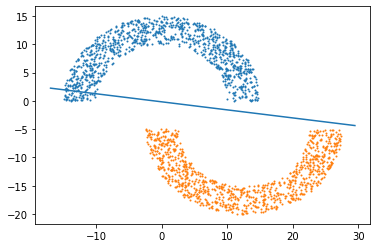

[-16.9836356   29.48366241]
[-1.80264802  2.59475633]


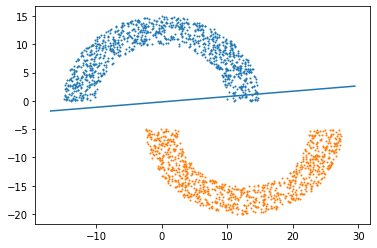

[-16.9836356   29.48366241]
[ 1.86149081 -3.819656  ]


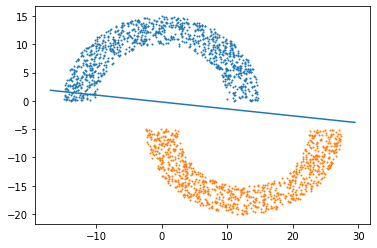

[-16.9836356   29.48366241]
[-1.783869    2.45754823]


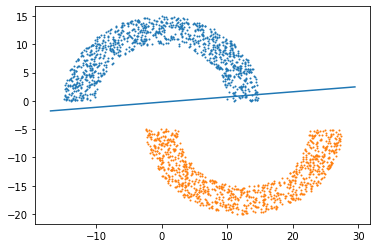

[-16.9836356   29.48366241]
[ 2.19795937 -4.49890227]


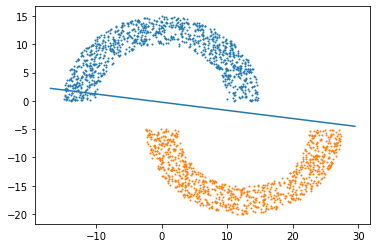

[-16.9836356   29.48366241]
[-1.74531407  2.30072433]


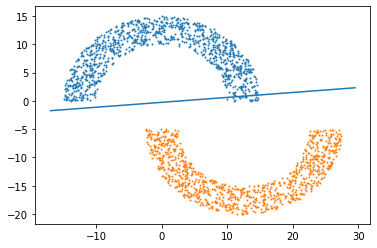

[-16.9836356   29.48366241]
[ 2.91092495 -5.83320794]


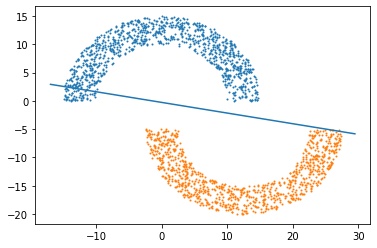

[-16.9836356   29.48366241]
[-1.70318632  2.15604091]


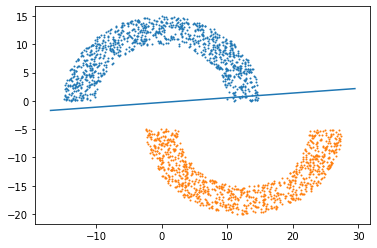

[-16.9836356   29.48366241]
[ 2.18696514 -4.63785242]


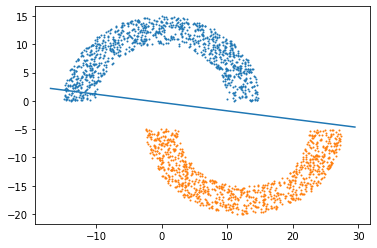

[-16.9836356   29.48366241]
[-2.26012773  3.06010557]


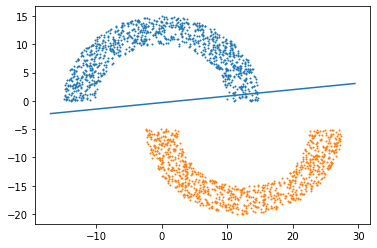

[-16.9836356   29.48366241]
[ 2.06543048 -4.49451604]


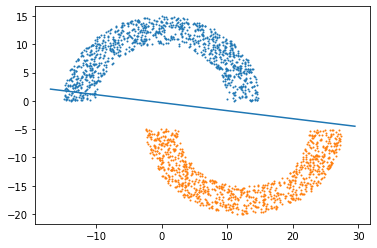

[-16.9836356   29.48366241]
[-1.88640901  2.33308386]


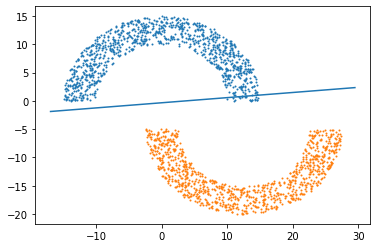

[-16.9836356   29.48366241]
[ 2.01194951 -4.48010648]


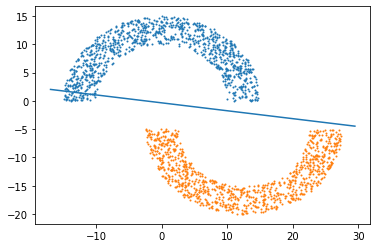

[-16.9836356   29.48366241]
[-1.61538289  1.78827423]


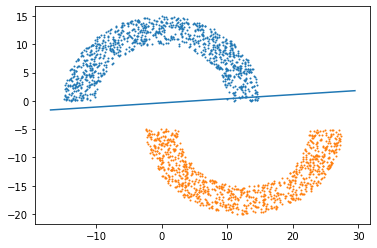

[-16.9836356   29.48366241]
[ 2.22255469 -4.91763179]


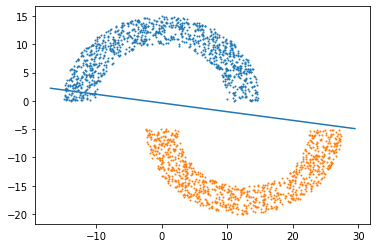

[-16.9836356   29.48366241]
[-1.7882185  2.0220611]


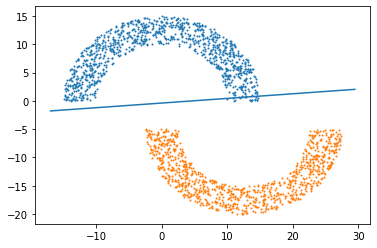

[-16.9836356   29.48366241]
[ 2.20680495 -4.94714373]


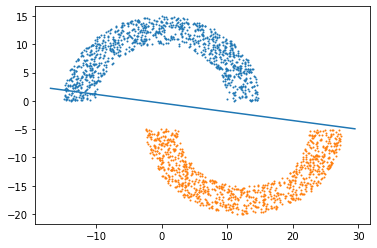

[-16.9836356   29.48366241]
[-1.19184325  0.93235085]


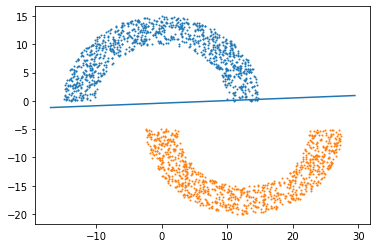

In [21]:
x_point = []
y_point = []
weight = [0,0,0]
count = 0
for i in range(len(data)):
        point = data[i]
        point.tolist()
     
        if(np.sign(np.matmul(point[0:3],weight)) != point[3]):
            
            weight = np.add(weight,(np.dot(point[3],point[0:3])))
            axes = plt.gca()
            plt.scatter(X1,Y1,s = 1)
            plt.scatter(X2,Y2,s = 1)
            x_h = np.array(axes.get_xlim())
            print(x_h)
            y_h = (-(weight[1]/weight[2])*x_h)-(weight[0]/weight[2])
            print(y_h)
            plt.plot(x_h,y_h)
            plt.show()

[ 0.         -0.00960553  0.07849692]


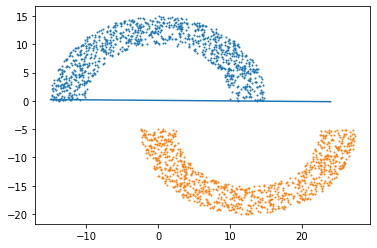

In [36]:
from sklearn import linear_model
r = linear_model.LinearRegression()
reg = r.fit(data[:, :3], data[:,-1])
#print(reg.coef_)
m = reg.coef_
print(m)
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
#x_h = np.array(axes.get_xlim())
#y_h = (-(weight[1]/weight[2])*x_h)-(weight[0]/weight[2])

x = np.arange(-15, 25)
plt.plot(x, m[1]*x+m[2])

plt.show()